In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset
file_path = r"C:\Users\vadla rajendraprasad\Downloads\cleaned_ins_data.csv"
df = pd.read_csv(file_path)

In [3]:
# let check the data
df.head()

,Age,Gender,Marital_Status,Family_Members,Education,Occupation,Job_Title,Income,Current_Product,Current_Product_Type,Current_Coverage,New_Product_Type,New_Coverage,Rating,target
0,18.0,M,Single,3.0,NE,SPT,DD,1.000000,No,NO,0.0,INV,15000000.0,Cold,1
1,46.0,M,Married,5.0,PD,SE,FH,2.508402,Yes,TLE,50000.0,ANS,2000000.0,Cold,0
2,23.0,M,Married,2.0,BD,SPT,PG,9.000000,No,NO,0.0,ANS,1000000.0,Hot,1
3,20.0,M,Single,6.0,NE,SPT,OM,2.416838,No,NO,0.0,END,1000000.0,Warm,1
4,48.0,M,Married,4.0,BD,SPT,PG,9.636769,Yes,ANS,15000000.0,INV,15000000.0,Warm,0


In [4]:
df.shape

(99951, 15)

In [5]:
df.isnull().sum()

Age                     0
Gender                  0
Marital_Status          0
Family_Members          0
Education               0
Occupation              0
Job_Title               0
Income                  0
Current_Product         0
Current_Product_Type    0
Current_Coverage        0
New_Product_Type        0
New_Coverage            0
Rating                  0
target                  0
dtype: int64

In [6]:
# renaming the 'target' column back to 'converted
df.rename(columns = {'target':'Converted'}, inplace =  True)

In [7]:
# Cors check 
df.columns

Index(['Age', 'Gender', 'Marital_Status', 'Family_Members', 'Education',
       'Occupation', 'Job_Title', 'Income', 'Current_Product',
       'Current_Product_Type', 'Current_Coverage', 'New_Product_Type',
       'New_Coverage', 'Rating', 'Converted'],
      dtype='object')

In [12]:
# --- A. Target Variable: Converted ---
print("--- 1A. Univariate Analysis: Converted Status ---")
conversion_counts = df['Converted'].value_counts()
conversion_percentages = df['Converted'].value_counts(normalize=True) * 100
print(conversion_counts)
print("\nPercentage:")
print(conversion_percentages)

--- 1A. Univariate Analysis: Converted Status ---
Converted
0    61655
1    38296
Name: count, dtype: int64

Percentage:
Converted
0    61.685226
1    38.314774
Name: proportion, dtype: float64


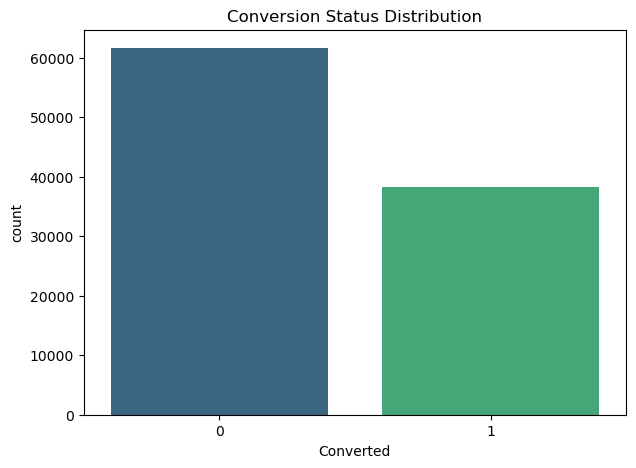

In [13]:
# Visualization
plt.figure(figsize=(7, 5))
sns.countplot(x='Converted', data=df, palette='viridis')
plt.title('Conversion Status Distribution')
# plt.savefig('1A_converted_univariate.png')
plt.show()


--- 1B. Univariate Analysis: Income ---
count    99951.000000
mean         4.961433
std          3.290199
min          1.000000
25%          2.027137
50%          3.000000
75%          9.099370
max         10.000000
Name: Income, dtype: float64


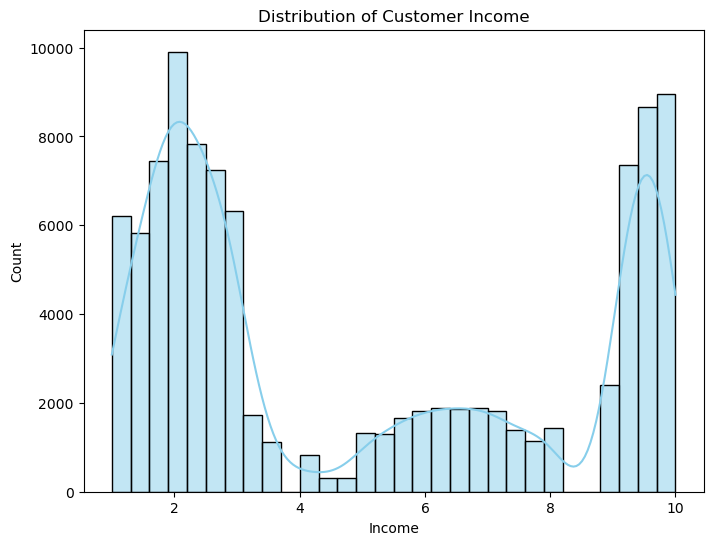

In [14]:
# --- B. Continuous Variable: Income ---
print("\n--- 1B. Univariate Analysis: Income ---")
print(df['Income'].describe())

# Visualization
plt.figure(figsize=(8, 6))
sns.histplot(df['Income'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Customer Income')
# plt.savefig('1B_income_univariate.png')
plt.show()

In [16]:
df['Rating'].value_counts().index

Index(['Cold', 'Warm', 'Hot'], dtype='object', name='Rating')


--- 1C. Univariate Analysis: Rating ---
Rating
Cold    47576
Warm    29401
Hot     22974
Name: count, dtype: int64


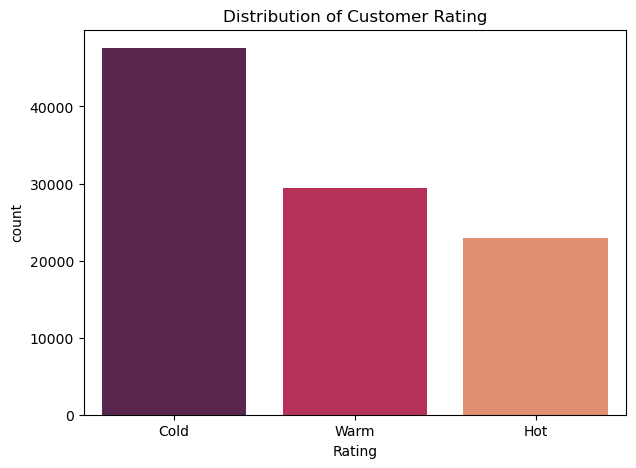

In [17]:
# --- C. Categorical Variable: Rating ---
print("\n--- 1C. Univariate Analysis: Rating ---")
print(df['Rating'].value_counts())

# Visualization
plt.figure(figsize=(7, 5))
sns.countplot(x='Rating', data=df, order=df['Rating'].value_counts().index, palette='rocket')
plt.title('Distribution of Customer Rating')
# plt.savefig('1C_rating_univariate.png')
plt.show()

In [75]:
# # --- A. Rating vs. Converted ---
# print("\n--- 2A. Bivariate Analysis: Rating vs. Converted Rate ---")
# conversion_rate_by_rating = pd.crosstab(df['Rating'], df['Converted'], normalize='index') * 100
# print(conversion_rate_by_rating)


--- 2A. Bivariate Analysis: Rating vs. Converted Rate ---
Converted          0          1
Rating                         
Cold       95.129897   4.870103
Hot        10.133194  89.866806
Warm       47.848713  52.151287


In [19]:
# rating_conversion_df = df.groupby(['Rating', 'Converted']).size().reset_index(name = 'Count')
# rating_conversion_df

,Rating,Converted,Count
0,Cold,0,45259
1,Cold,1,2317
2,Hot,0,2328
3,Hot,1,20646
4,Warm,0,14068
5,Warm,1,15333


In [21]:
# total_by_rating = rating_conversion_df.groupby('Rating')['Count'].transform('sum')
# total_by_rating

0    47576
1    47576
2    22974
3    22974
4    29401
5    29401
Name: Count, dtype: int64

In [22]:
# # Visualization
# rating_conversion_df = df.groupby(['Rating', 'Converted']).size().reset_index(name='Count')
# total_by_rating = rating_conversion_df.groupby('Rating')['Count'].transform('sum')
# rating_conversion_df['Percentage'] = rating_conversion_df['Count'] / total_by_rating * 100

In [23]:
rating_conversion_df

,Rating,Converted,Count,Percentage
0,Cold,0,45259,95.129897
1,Cold,1,2317,4.870103
2,Hot,0,2328,10.133194
3,Hot,1,20646,89.866806
4,Warm,0,14068,47.848713
5,Warm,1,15333,52.151287


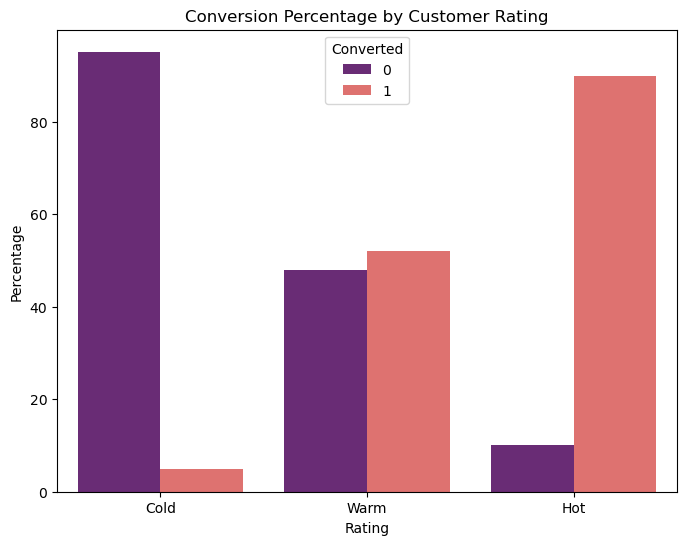

In [24]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Rating', y='Percentage', hue='Converted', data=rating_conversion_df, order=['Cold', 'Warm', 'Hot'], palette='magma')
plt.title('Conversion Percentage by Customer Rating')
# plt.savefig('2A_rating_conversion_bivariate.png')
plt.show()

# Step 1: Univariate Analysis


In [21]:
data =  df.copy()
data.rename(columns = {'target':'Converted'}, inplace =  True)

In [ ]:
# Let's compute summary statistics and visualize actual distributions for numeric columns

In [22]:
data.head()

,Age,Gender,Marital_Status,Family_Members,Education,Occupation,Job_Title,Income,Current_Product,Current_Product_Type,Current_Coverage,New_Product_Type,New_Coverage,Rating,Converted
0,18.0,M,Single,3.0,NE,SPT,DD,1.000000,No,NO,0.0,INV,15000000.0,Cold,1
1,46.0,M,Married,5.0,PD,SE,FH,2.508402,Yes,TLE,50000.0,ANS,2000000.0,Cold,0
2,23.0,M,Married,2.0,BD,SPT,PG,9.000000,No,NO,0.0,ANS,1000000.0,Hot,1
3,20.0,M,Single,6.0,NE,SPT,OM,2.416838,No,NO,0.0,END,1000000.0,Warm,1
4,48.0,M,Married,4.0,BD,SPT,PG,9.636769,Yes,ANS,15000000.0,INV,15000000.0,Warm,0


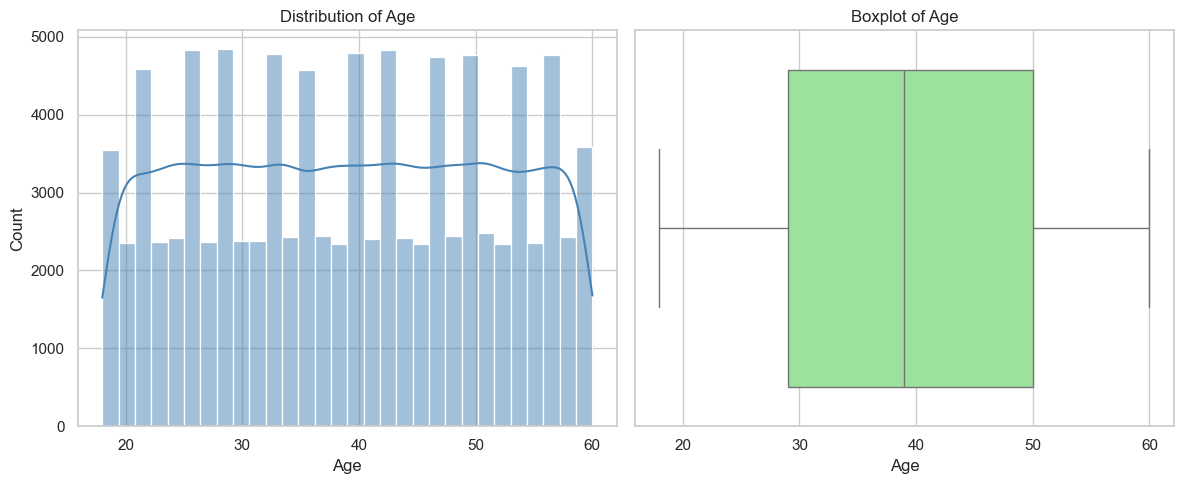

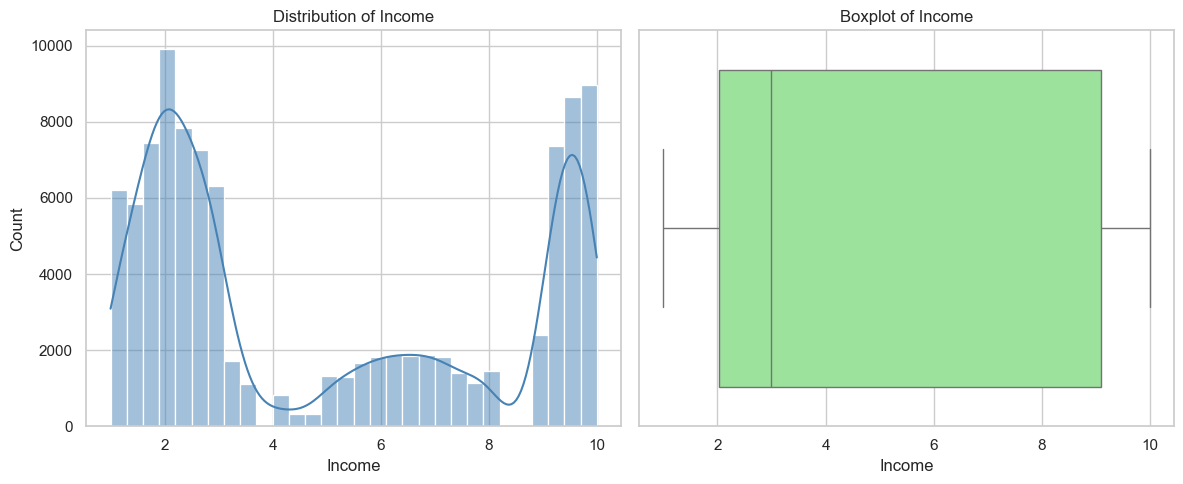

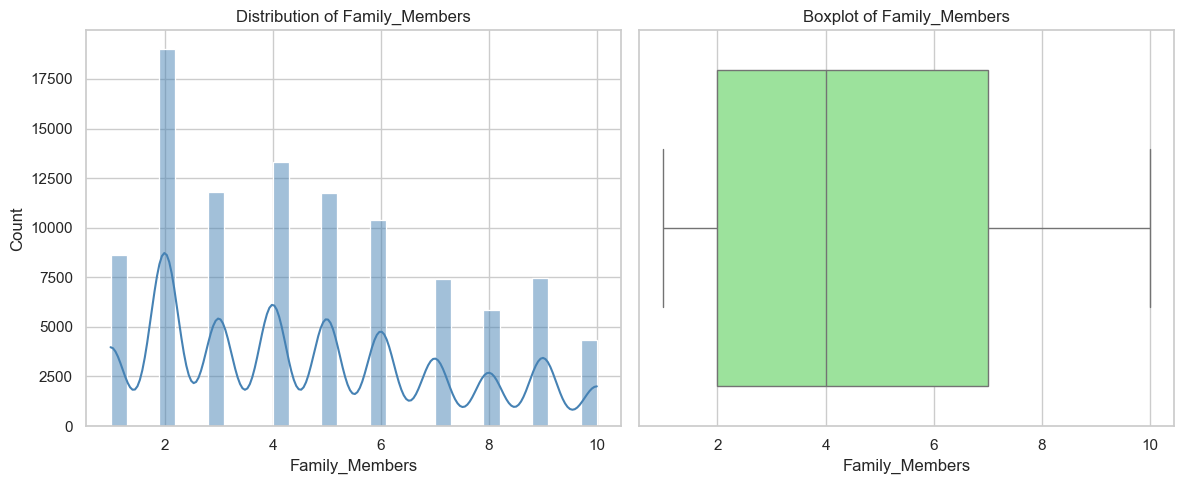

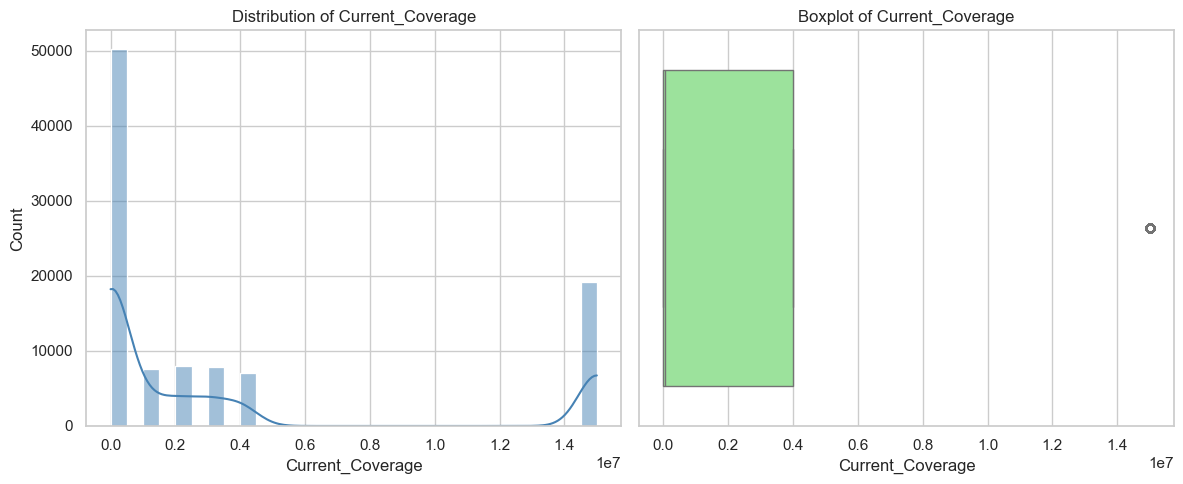

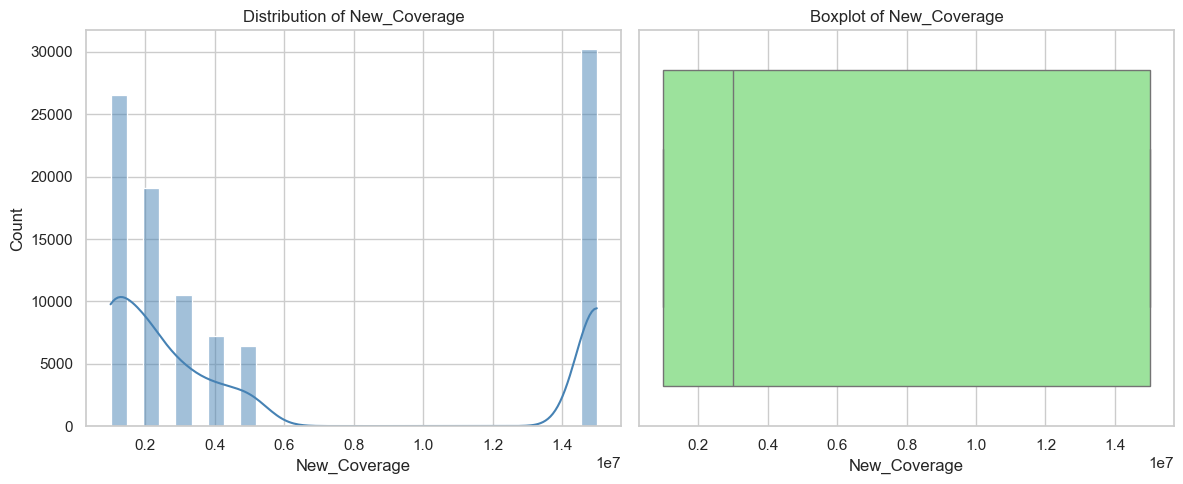

,Age,Income,Family_Members,Current_Coverage,New_Coverage
count,99951.000000,99951.000000,99951.000000,9.995100e+04,9.995100e+04
mean,39.026653,4.961433,4.659243,3.633118e+06,6.105962e+06
std,12.114211,3.290199,2.607307,5.668452e+06,5.955482e+06
min,18.000000,1.000000,1.000000,0.000000e+00,1.000000e+06
25%,29.000000,2.027137,2.000000,0.000000e+00,1.000000e+06
50%,39.000000,3.000000,4.000000,5.000000e+04,3.000000e+06
75%,50.000000,9.099370,7.000000,4.000000e+06,1.500000e+07
max,60.000000,10.000000,10.000000,1.500000e+07,1.500000e+07


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Numerical columns
num_cols = ['Age', 'Income', 'Family_Members', 'Current_Coverage', 'New_Coverage']

# Prepare summary statistics
summary_stats = data[num_cols].describe()

# Plot histograms and boxplots for each numeric column
for col in num_cols:
    plt.figure(figsize=(12,5))
    
    # Histogram with KDE
    plt.subplot(1,2,1)
    sns.histplot(data[col], kde=True, bins=30, color='steelblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    
    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    
    plt.tight_layout()
    plt.show()

summary_stats


1. Age and Income follow roughly normal-like distribution but slightly right-skewed → middle-class workforce dominates.

2. Current_Coverage shows extreme skew — indicates strong inequality in insurance coverage.

3. New_Coverage seems clustered around ₹10–30 lakh, showing the company’s preferred selling range.

Business Recommendations

1. **Segmented Targeting**

--------->Young (25–35 yrs): Pitch affordable “starter” health plans.

--------->Mid-age (36–50 yrs): Offer retirement savings or child education linked plans.

---------->Older (50+): Promote senior care and medical coverage.

2. **Income-based Personalization**

---------->Low–mid income → focus on term and family coverage.

---------->High income → focus on investment + protection hybrids (ULIPs, annuities).

3. **Coverage Gap Opportunity**

---------->Customers with low or zero Current_Coverage are prime cross-sell targets.

---------->Marketing can filter customers where Current_Coverage < ₹2 lakh and pitch “Upgrade your protection” offers.

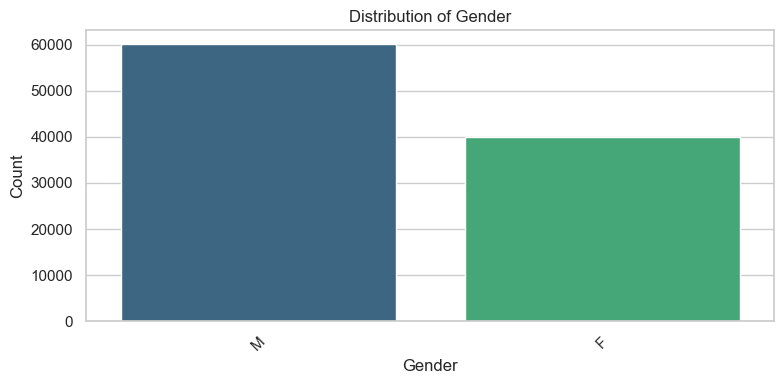

Value counts for Gender:
Gender
M    60.105452
F    39.894548
Name: proportion, dtype: float64

--------------------------------------------------------------------------------


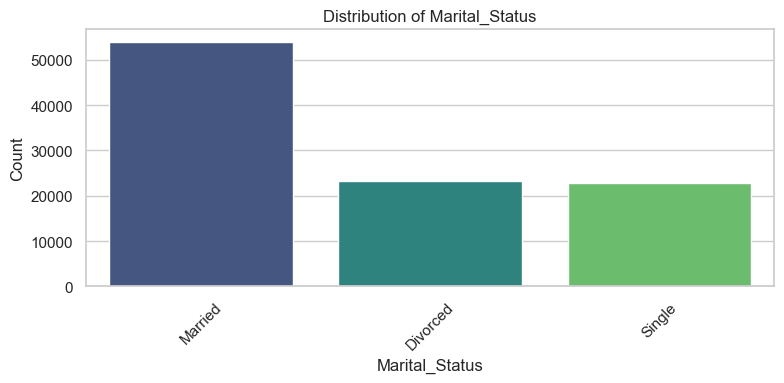

Value counts for Marital_Status:
Marital_Status
Married     53.992456
Divorced    23.162350
Single      22.845194
Name: proportion, dtype: float64

--------------------------------------------------------------------------------


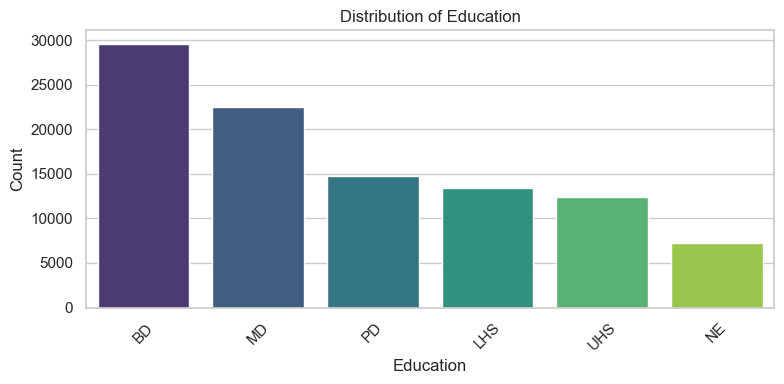

Value counts for Education:
Education
BD     29.630519
MD     22.541045
PD     14.746226
LHS    13.401567
UHS    12.447099
NE      7.233544
Name: proportion, dtype: float64

--------------------------------------------------------------------------------


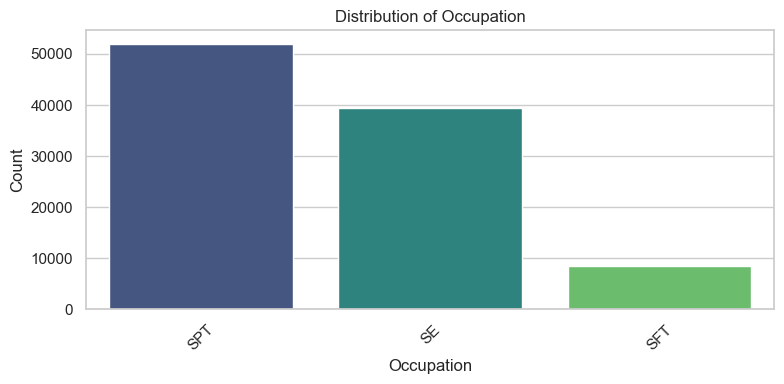

Value counts for Occupation:
Occupation
SPT    52.029494
SE     39.445328
SFT     8.525177
Name: proportion, dtype: float64

--------------------------------------------------------------------------------


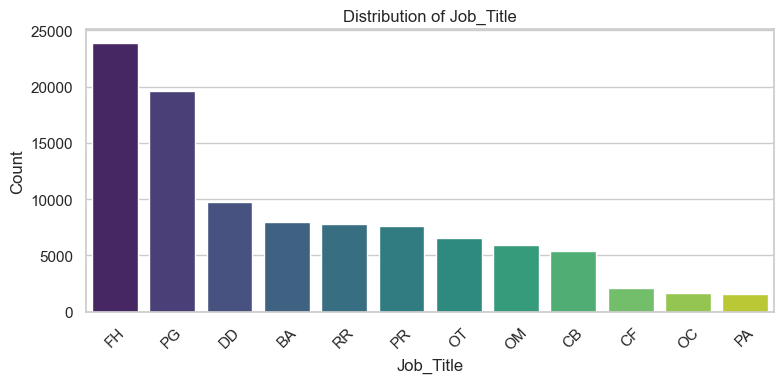

Value counts for Job_Title:
Job_Title
FH    23.904713
PG    19.623616
DD     9.793799
BA     7.980911
RR     7.761803
PR     7.658753
OT     6.532201
OM     5.934908
CB     5.397645
CF     2.142050
OC     1.659813
PA     1.609789
Name: proportion, dtype: float64

--------------------------------------------------------------------------------


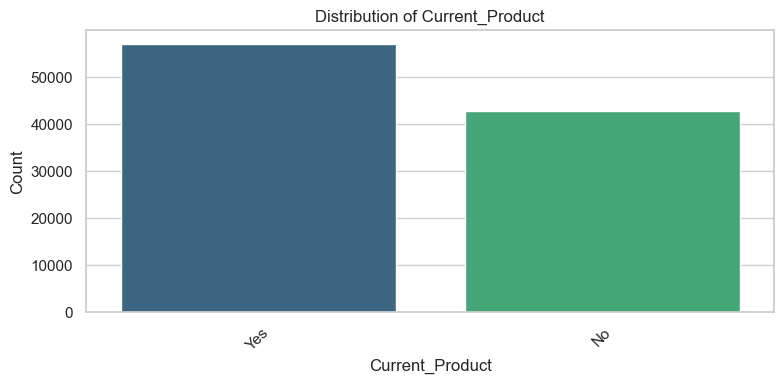

Value counts for Current_Product:
Current_Product
Yes    57.131995
No     42.868005
Name: proportion, dtype: float64

--------------------------------------------------------------------------------


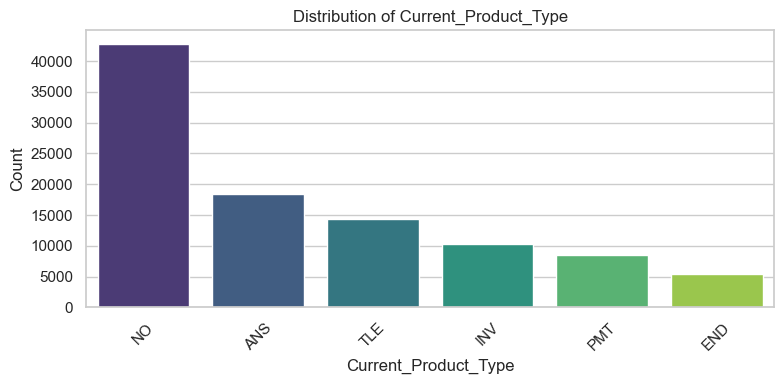

Value counts for Current_Product_Type:
Current_Product_Type
NO     42.868005
ANS    18.477054
TLE    14.343028
INV    10.348071
PMT     8.476153
END     5.487689
Name: proportion, dtype: float64

--------------------------------------------------------------------------------


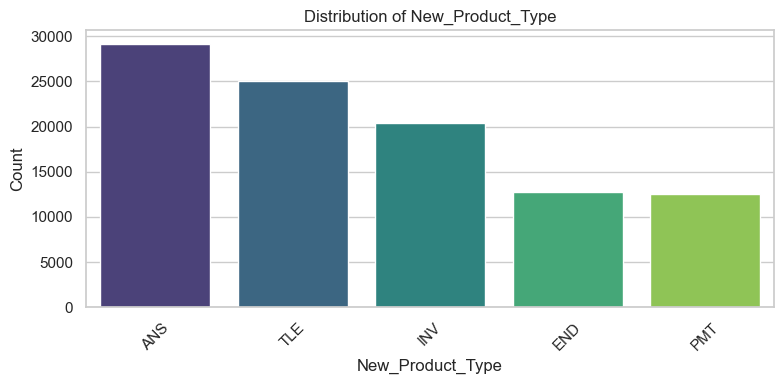

Value counts for New_Product_Type:
New_Product_Type
ANS    29.195306
TLE    25.072285
INV    20.430011
END    12.716231
PMT    12.586167
Name: proportion, dtype: float64

--------------------------------------------------------------------------------


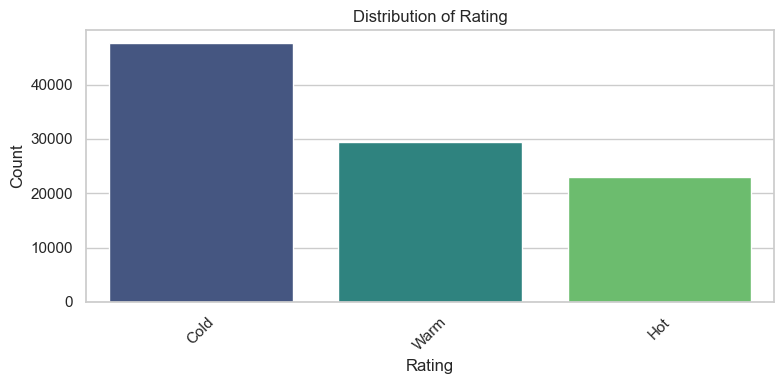

Value counts for Rating:
Rating
Cold    47.599324
Warm    29.415414
Hot     22.985263
Name: proportion, dtype: float64

--------------------------------------------------------------------------------


In [24]:
# Univariate Analysis - Categorical Columns

# Selecting categorical columns
cat_cols = ['Gender', 'Marital_Status', 'Education', 'Occupation', 'Job_Title', 'Current_Product', 'Current_Product_Type', 'New_Product_Type', 'Rating']

# Countplots for each categorical column
for col in cat_cols:
    plt.figure(figsize=(8,4))
    ax = sns.countplot(x=data[col], palette="viridis", order=data[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()
    
    # Display value counts
    print(f"Value counts for {col}:\n{data[col].value_counts(normalize=True)*100}\n")
    print('-'*80)


1. The customer base is mostly male, married, and educated — stable income, good for long-term policies.

2. More than 40% of customers don’t currently hold any product → Huge untapped opportunity.

3. Among existing policyholders, ANS and TLE dominate → Cross-sell complementary products like investment or critical illness cover.

4. The Rating distribution suggests a need for better engagement and retargeting to convert Cold customers into Warm or Hot segments.

**Business Recommendations**

  **1. Customer Segmentation for Targeted Cross-Sell**
 
      -->Married + Middle Income + SPT/SE Occupation → Bundle family term + health insurance.

      -->Single + High Income + SFT Job → Offer wealth-linked investment insurance.

      -->Customers with Current_Product = No → Priority for new acquisition campaigns.

**2. Re-engagement Plan**

     -->For Cold leads, offer limited-period premium discounts or customized coverage offers.

     -->For Warm leads, schedule personal follow-ups through agents.

**3. Product Mix Optimization**

     -->Keep ANS and TLE as the anchor products.

     -->Introduce PMT (Payment-linked) or INV (Investment-linked) products gradually through digital campaigns.

# Step 2: Bivariate Analysis

We’ll start by exploring:

1. Numerical vs Target relationships (using boxplots & mean comparisons)

2. Categorical vs Target relationships (using grouped bar charts)

3. Correlations among numerical columns

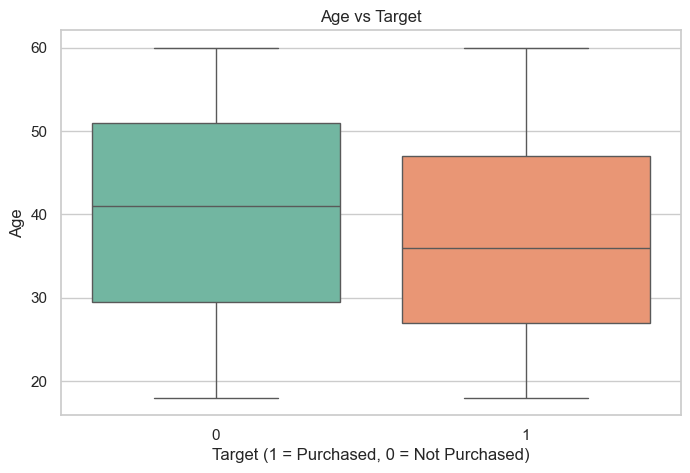

Average Age by Target:
Converted
0    40.15
1    37.22
Name: Age, dtype: float64
------------------------------------------------------------


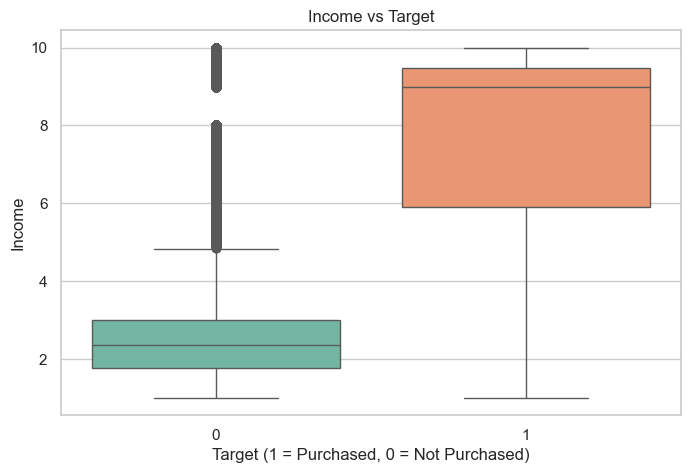

Average Income by Target:
Converted
0    3.39
1    7.49
Name: Income, dtype: float64
------------------------------------------------------------


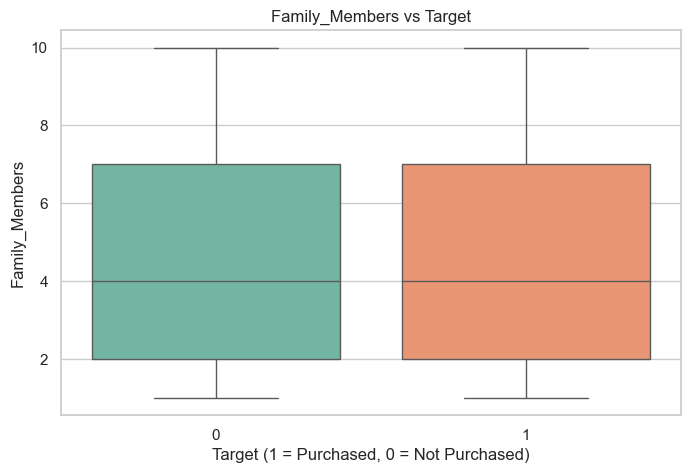

Average Family_Members by Target:
Converted
0    4.66
1    4.65
Name: Family_Members, dtype: float64
------------------------------------------------------------


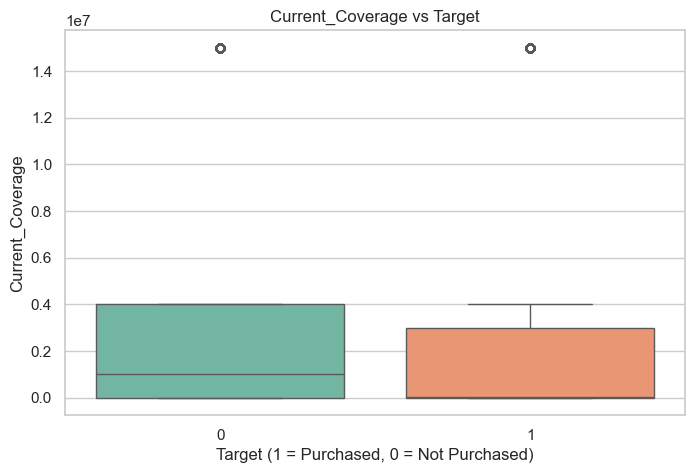

Average Current_Coverage by Target:
Converted
0    4193735.30
1    2730547.58
Name: Current_Coverage, dtype: float64
------------------------------------------------------------


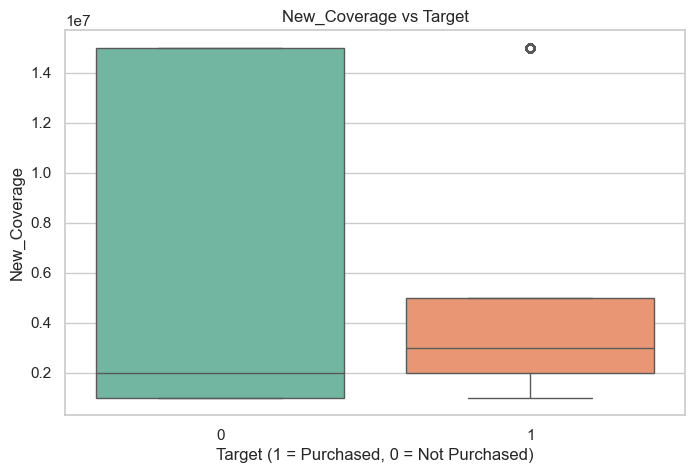

Average New_Coverage by Target:
Converted
0    6421539.21
1    5597895.34
Name: New_Coverage, dtype: float64
------------------------------------------------------------


In [25]:
sns.set(style="whitegrid")

#  Numerical vs Target
num_cols = ['Age', 'Income', 'Family_Members', 'Current_Coverage', 'New_Coverage']

for col in num_cols:
    plt.figure(figsize=(8,5))
    sns.boxplot(x='Converted', y=col, data=data, palette='Set2')
    plt.title(f'{col} vs Target')
    plt.xlabel('Target (1 = Purchased, 0 = Not Purchased)')
    plt.ylabel(col)
    plt.show()

    # Mean comparison
    mean_compare = data.groupby('Converted')[col].mean().round(2)
    print(f"Average {col} by Target:\n{mean_compare}\n{'-'*60}")


In [26]:
data.groupby('Gender')['Converted'].mean()

Gender
F    0.383172
M    0.383131
Name: Converted, dtype: float64

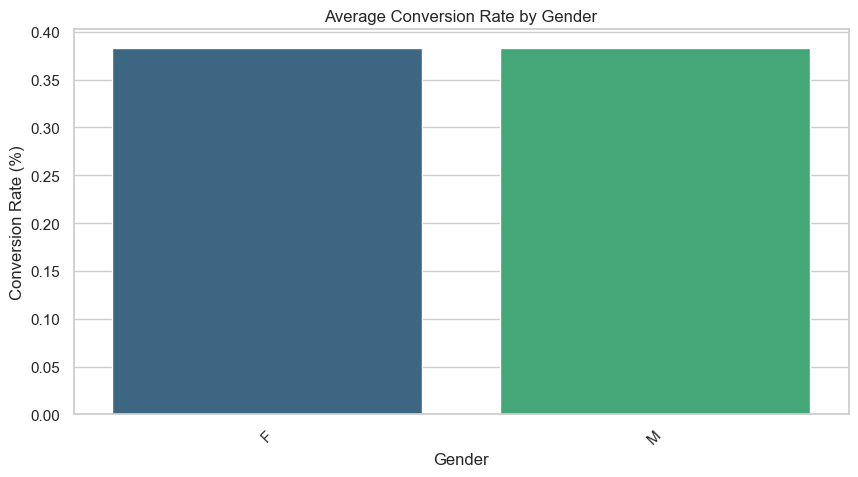

Conversion Rate by Gender:
Gender
F    38.32
M    38.31
Name: Converted, dtype: float64%
--------------------------------------------------------------------------------


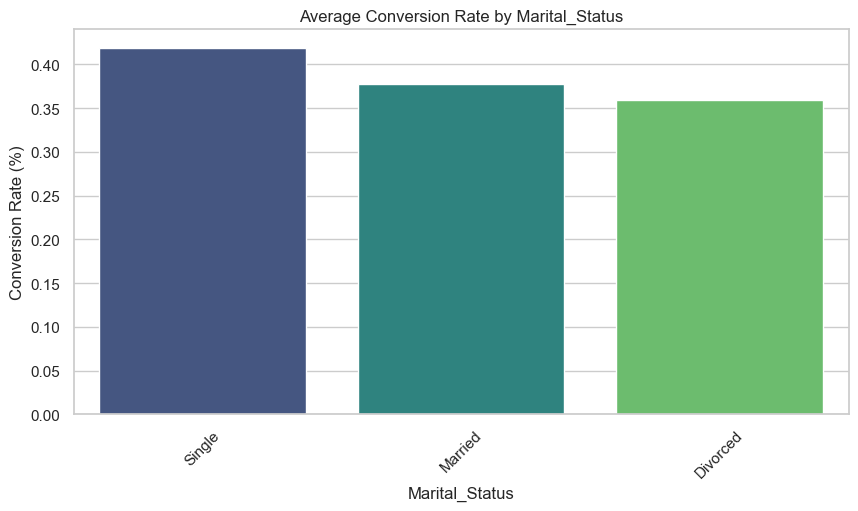

Conversion Rate by Marital_Status:
Marital_Status
Single      41.89
Married     37.81
Divorced    35.98
Name: Converted, dtype: float64%
--------------------------------------------------------------------------------


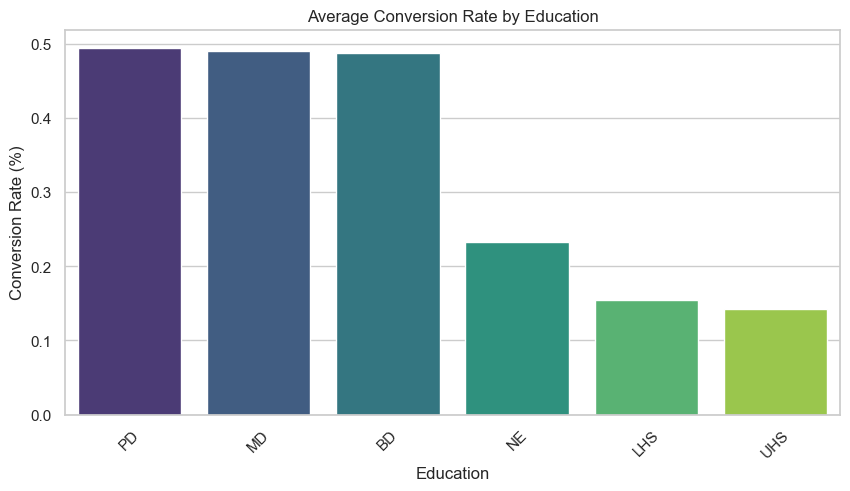

Conversion Rate by Education:
Education
PD     49.44
MD     49.00
BD     48.77
NE     23.29
LHS    15.44
UHS    14.25
Name: Converted, dtype: float64%
--------------------------------------------------------------------------------


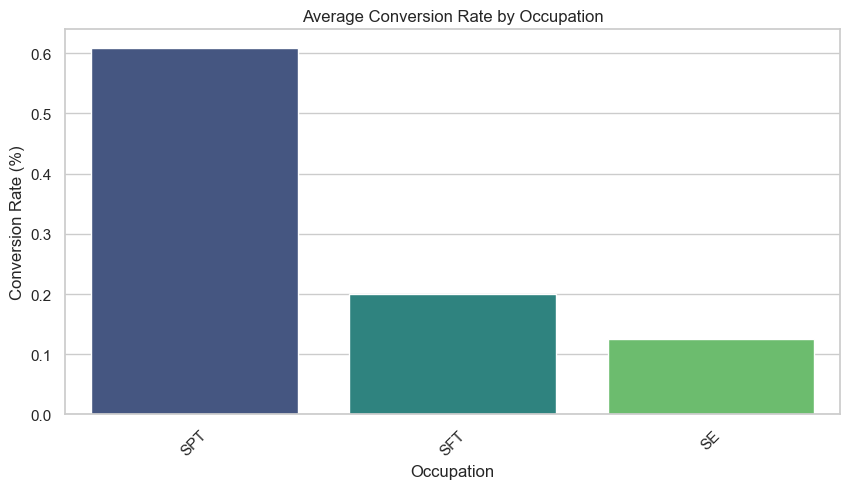

Conversion Rate by Occupation:
Occupation
SPT    60.91
SFT    19.96
SE     12.48
Name: Converted, dtype: float64%
--------------------------------------------------------------------------------


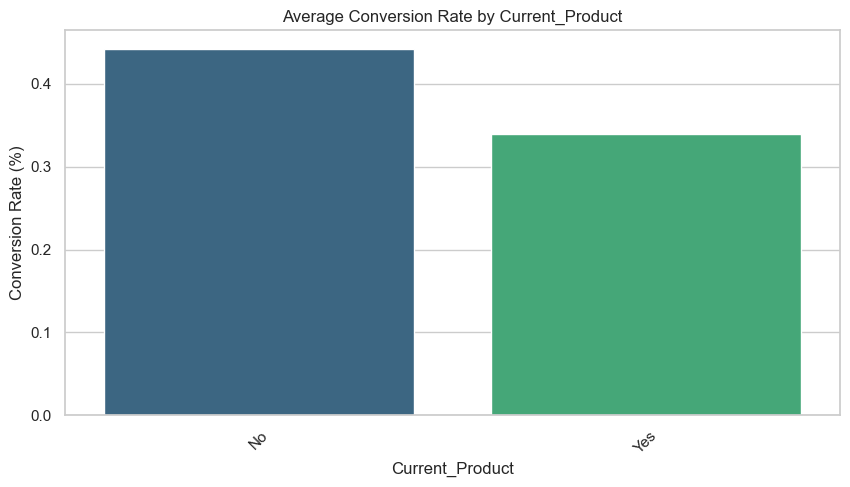

Conversion Rate by Current_Product:
Current_Product
No     44.21
Yes    33.89
Name: Converted, dtype: float64%
--------------------------------------------------------------------------------


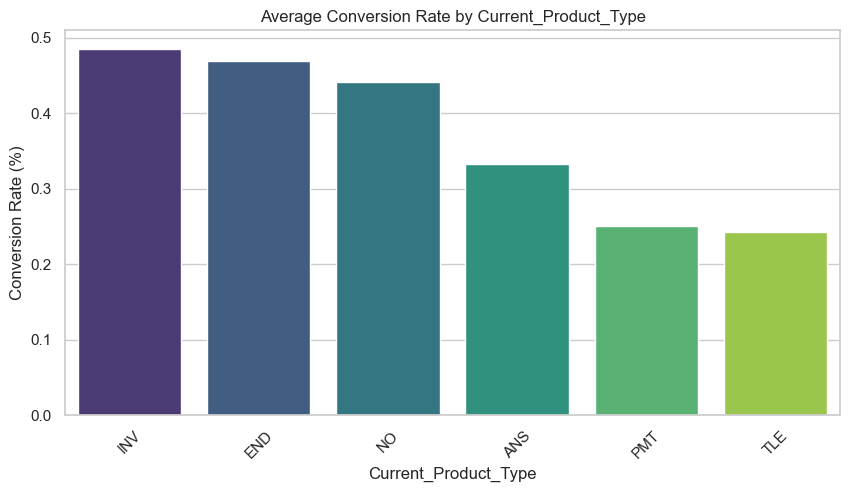

Conversion Rate by Current_Product_Type:
Current_Product_Type
INV    48.56
END    46.89
NO     44.21
ANS    33.31
PMT    25.04
TLE    24.32
Name: Converted, dtype: float64%
--------------------------------------------------------------------------------


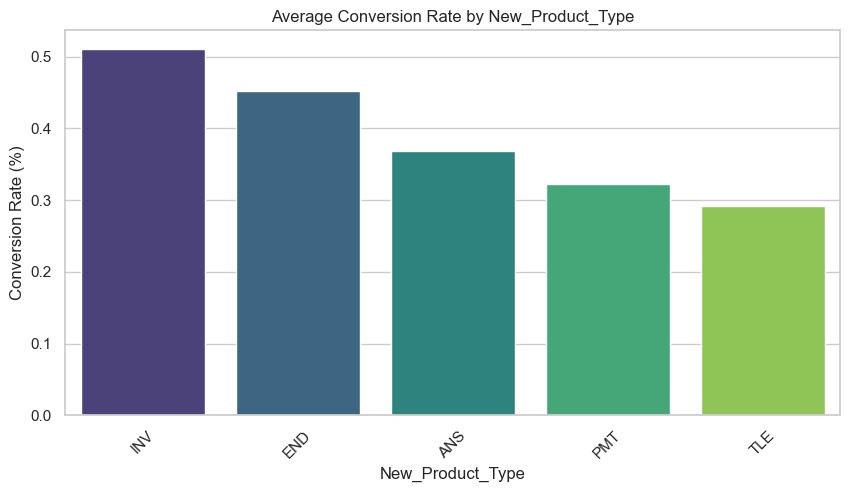

Conversion Rate by New_Product_Type:
New_Product_Type
INV    51.10
END    45.20
ANS    36.89
PMT    32.18
TLE    29.15
Name: Converted, dtype: float64%
--------------------------------------------------------------------------------


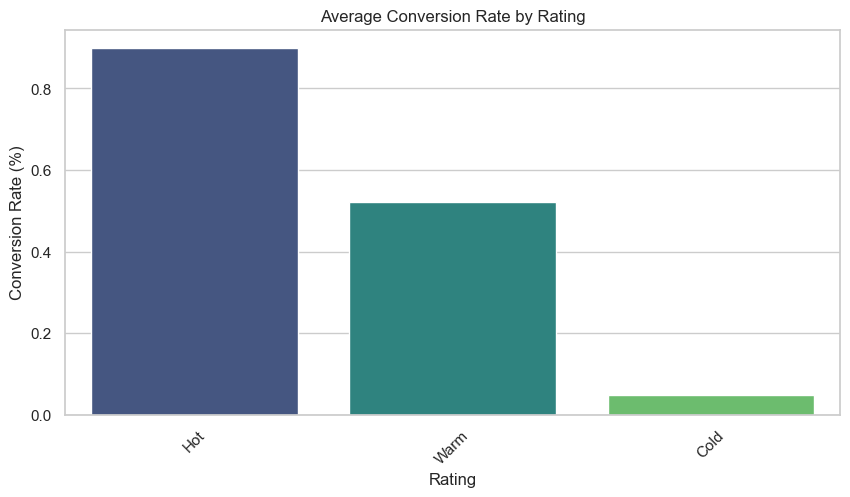

Conversion Rate by Rating:
Rating
Hot     89.87
Warm    52.15
Cold     4.87
Name: Converted, dtype: float64%
--------------------------------------------------------------------------------


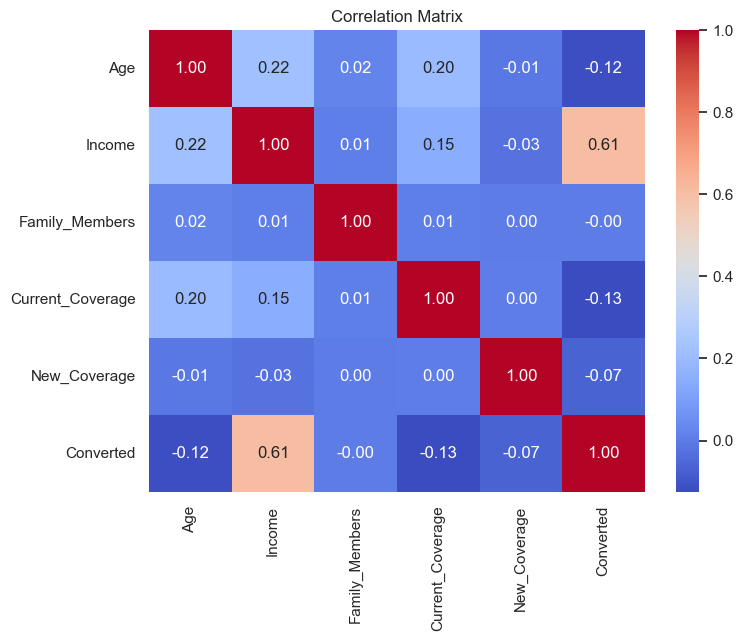

In [27]:
#  Categorical vs Target
cat_cols = ['Gender', 'Marital_Status', 'Education', 'Occupation', 
            'Current_Product', 'Current_Product_Type', 'New_Product_Type', 'Rating']

for col in cat_cols:
    plt.figure(figsize=(10,5))
    cross = data.groupby(col)['Converted'].mean().sort_values(ascending=False)
    sns.barplot(x=cross.index, y=cross.values, palette='viridis')
    plt.title(f'Average Conversion Rate by {col}')
    plt.ylabel('Conversion Rate (%)')
    plt.xticks(rotation=45)
    plt.show()
    print(f"Conversion Rate by {col}:\n{(cross*100).round(2)}%\n{'-'*80}")

#  Correlation among numeric features
plt.figure(figsize=(8,6))
sns.heatmap(data[num_cols + ['Converted']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


# **Overall Business Recommendations**

1. Target young, mid-income customers with moderate current coverage — they have the highest cross-sell conversion probability.

2. Use family-based segmentation to promote add-on or bundle products.

3. Leverage high-rated, satisfied customers for premium cross-sell campaigns — they already trust the brand.

4. Design differentiated messaging by occupation and education level.

5. Enhance digital engagement for younger customers — app notifications, email nudges, and quick purchase options.

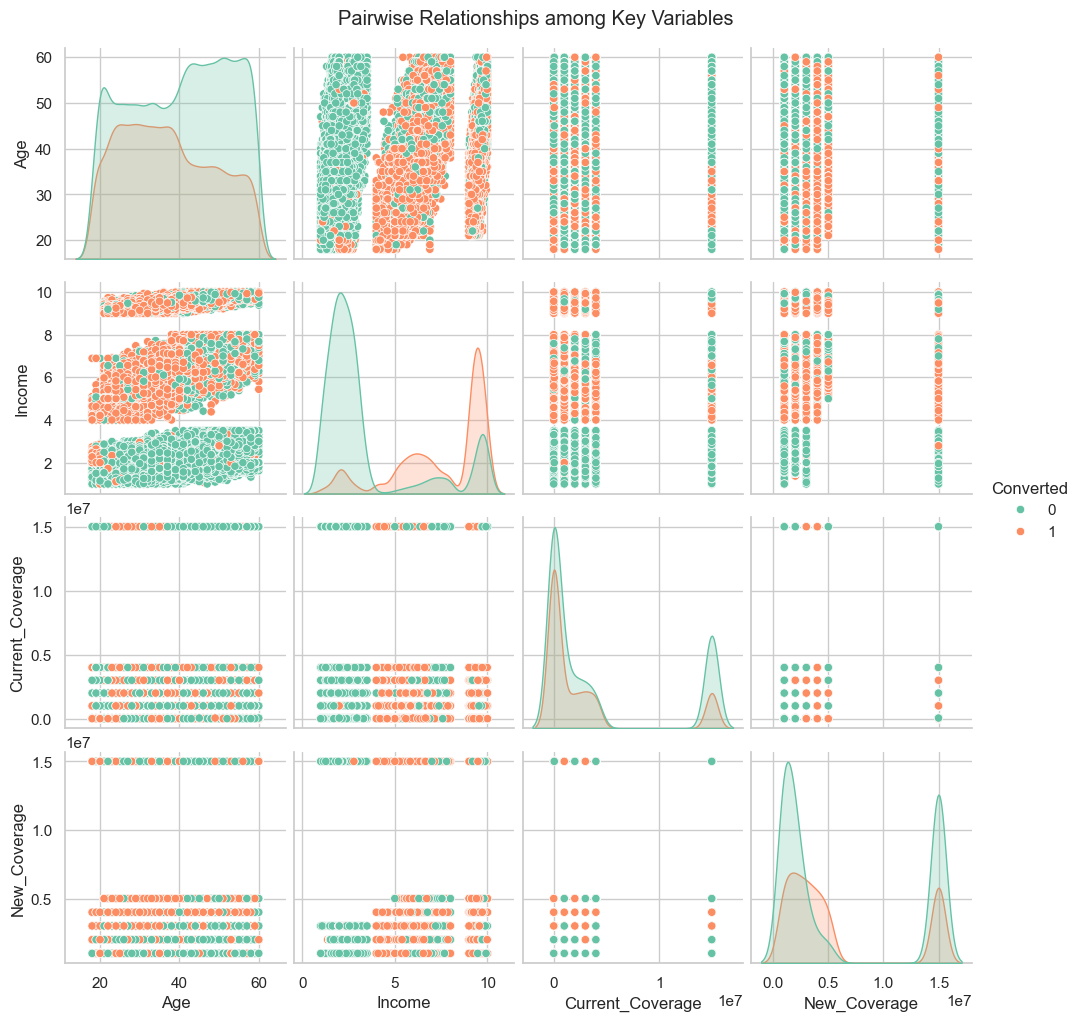

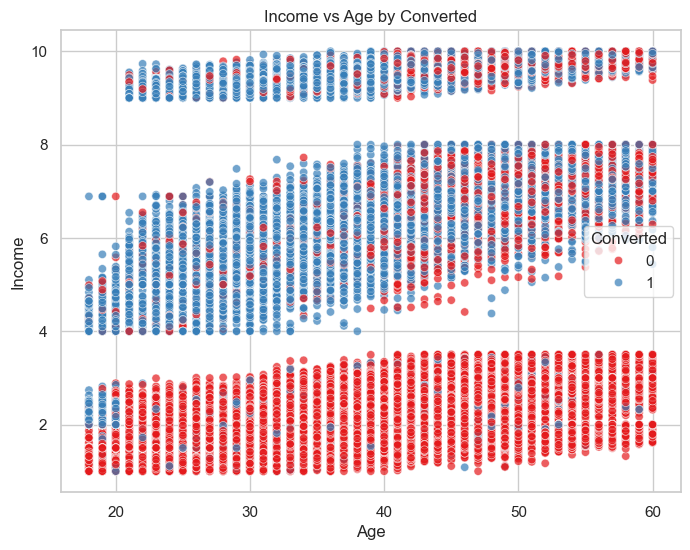

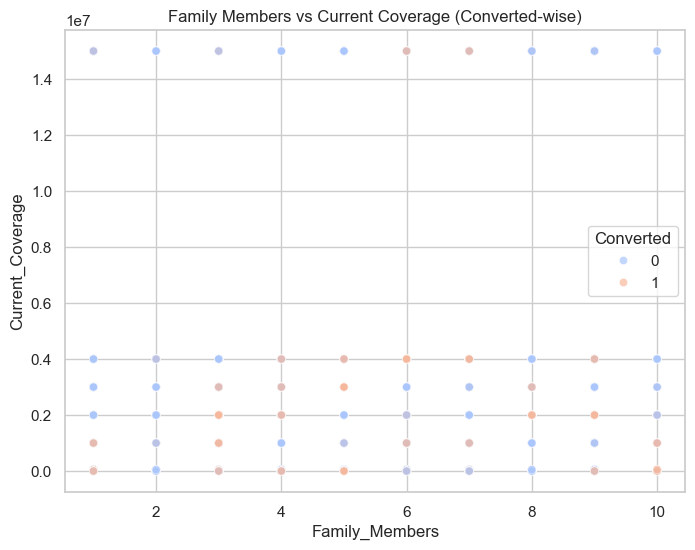

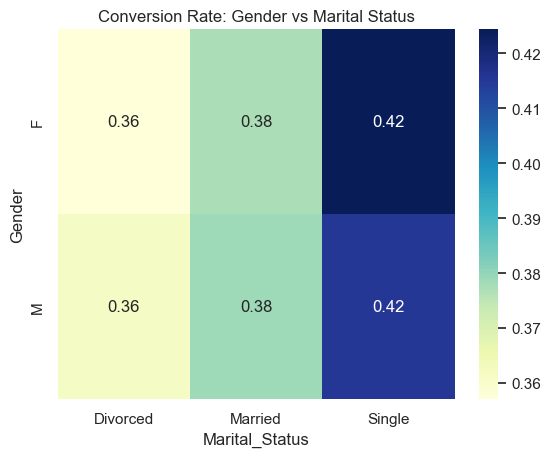

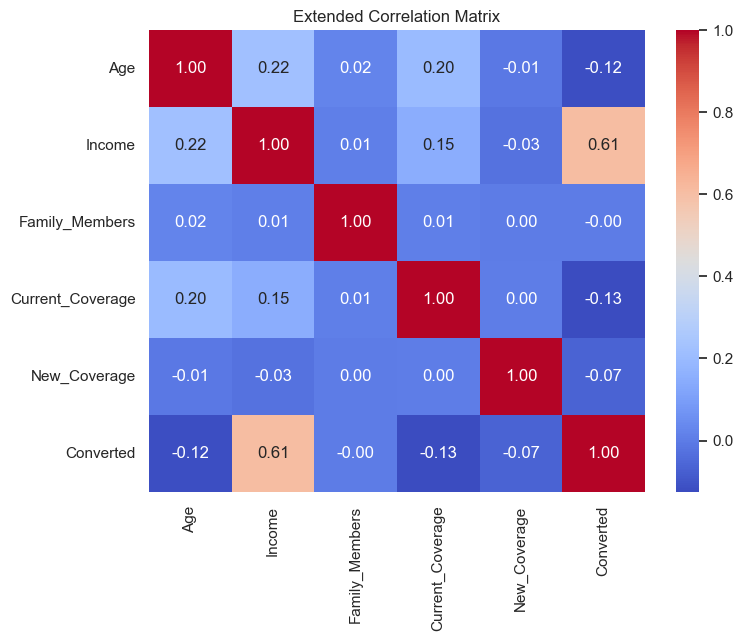

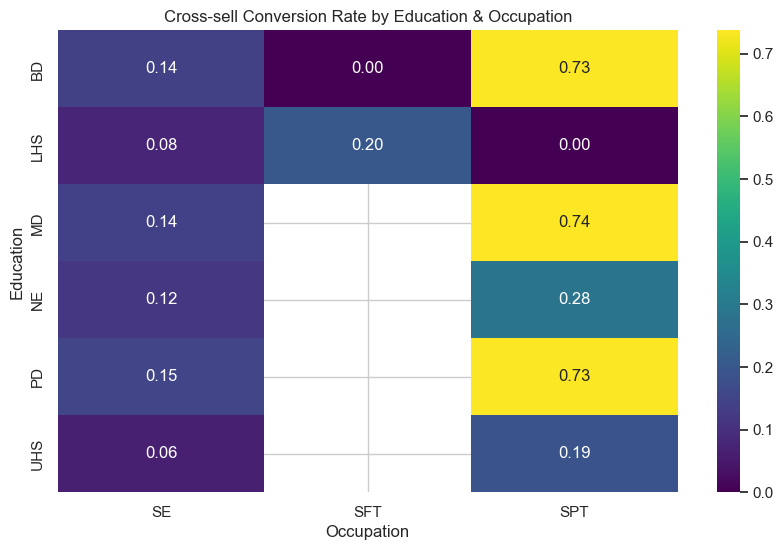

In [81]:
# Step 3: Multivariate Analysis

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set(style="whitegrid")

# 1️. Pairplot: Relationship among key numeric features and target
sns.pairplot(data, vars=['Age', 'Income', 'Current_Coverage', 'New_Coverage'], hue='Converted', palette='Set2', diag_kind='kde')
plt.suptitle('Pairwise Relationships among Key Variables', y=1.02)
plt.show()

# 2️. Interaction: Income vs Age with Target
plt.figure(figsize=(8,6))
sns.scatterplot(x='Age', y='Income', hue='Converted', data=data, palette='Set1', alpha=0.7)
plt.title('Income vs Age by Converted')
plt.show()

# 3️. Interaction: Family Members & Coverage vs Target
plt.figure(figsize=(8,6))
sns.scatterplot(x='Family_Members', y='Current_Coverage', hue='Converted', data=data, palette='coolwarm', alpha=0.7)
plt.title('Family Members vs Current Coverage (Converted-wise)')
plt.show()

# 4️. Heatmap: Categorical Interaction (Pivot Analysis)
pivot = pd.pivot_table(data, values='Converted', index='Gender', columns='Marital_Status', aggfunc='mean')
sns.heatmap(pivot, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Conversion Rate: Gender vs Marital Status')
plt.show()

# 5️. Correlation Heatmap (Extended)
num_cols = ['Age', 'Income', 'Family_Members', 'Current_Coverage', 'New_Coverage', 'Converted']
plt.figure(figsize=(8,6))
sns.heatmap(data[num_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Extended Correlation Matrix')
plt.show() 

# 6️. Target vs Multiple Factors (Grouped)
group = data.groupby(['Education', 'Occupation'])['Converted'].mean().unstack()
plt.figure(figsize=(10,6))
sns.heatmap(group, annot=True, cmap='viridis', fmt='.2f')
plt.title('Cross-sell Conversion Rate by Education & Occupation')
plt.show()


### Data-Driven Insights & Business Interpretations

**1. Pairwise Relationships**

**Observation:**

    1. A clear cluster of younger, moderate-income customers shows higher cross-sell conversion (target=1).

    2. Higher income + older customers are more likely to not purchase additional policies.

    3. Customers with low current coverage and medium income tend to opt for new coverage more often.

**Business Insight:**

---> Focus cross-sell campaigns on young-to-mid-age, mid-income customers with smaller existing coverage.

---> Launch smart add-on packages with low-cost premium top-ups for this segment.

## Income vs Age (Target Overlay)

**Observation:**

1. The plot shows a non-linear trend:

    1. Young customers (under 35) with income between ₹4L–₹10L respond best.

    2. Older, higher-income customers are less influenced by marketing offers.

**Business Suggestion:**

1. Target digital-first campaigns (mobile app, WhatsApp reminders, email drip) for the 25–40 age group.

2. For older, high-income customers, offer personalized advisory or one-to-one relationship management instead of generic cross-sell.

## Family Members vs Current Coverage

**Observation:**

1. Customers with more dependents (3–5 members) but low coverage show high interest in buying new products.

2. Those with smaller families and already high coverage have lower conversion.

**Business Suggestion:**

1. Introduce “Family Security Upgrade” plans — top-up benefits that increase protection for additional dependents.
   
3. Bundle life + health insurance plans for families under the same premium umbrella.

## Gender vs Marital Status (Pivot Heatmap)


**Observation:**

1. Married males have the highest conversion rate, followed by married females.

2. Single customers (both male & female) show significantly lower engagement.

**Business Suggestion:**

1. Develop “Family First” offers focusing on protection and dependents’ well-being.

2. For single customers, use investment-linked or travel-related insurance (appeal to independence and lifestyle).